In [ ]:
!pip install seaborn

In [ ]:
from nixtlats import TimeGPT

In [121]:
timegpt = TimeGPT(token='nixt-fHQhZ4eiKzjLaADTJh8YYJkN9g9ETtQb3kXc6dXcgR0v9qpyS2g1exrq28dE5I6T4MVnjO4Cx9YyddMY')
# If expired, you can get a new token from https://dashboard.nixtla.io/team/1246481/API-Keys

In [122]:
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [17]:
import pandas as pd
import numpy as np

## Load Data

In [18]:
raw = pd.read_csv('tr_eikon_eod_data.csv', 
                 index_col = 0, parse_dates = True)
data = pd.DataFrame(raw[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna())
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


## Correlation matrix

In [91]:
data.corr()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
AAPL.O,1.000000,0.924437,0.920085,0.888065,0.766361
MSFT.O,0.924437,1.000000,0.950978,0.976018,0.839008
INTC.O,0.920085,0.950978,1.000000,0.909608,0.762886
AMZN.O,0.888065,0.976018,0.909608,1.000000,0.783544
GS.N,0.766361,0.839008,0.762886,0.783544,1.000000


There is high correlation between AAPL.O, MSFT.O, INTC.O, AMZN.O, and moderately positive correlation between GS.N and each of them. Hence we tried predicting the prices for all of them using the same model (Remove the outer for loop below and changing n_tickers to 5). However, the model performed poorly, and hence we decided to predict the prices for each of them separately.

## Predict Prices (Zero Shot i.e. without fine tuning)

In [ ]:
final_predictions_zero_shot = {}
i = 0
for ticker in tickers_to_use:
    data_ticker = pd.DataFrame(data[ticker])
    data_ticker['timestamp'] = data.index
    print(data_ticker)
    values_per_ticker_predicted_in_one_run = 20
    n_tickers = 1
    values_predicted_in_one_run = values_per_ticker_predicted_in_one_run * n_tickers
    train_test_split = 0.8
    number_of_rows_in_train = int(len(data_ticker) * train_test_split) * n_tickers
    number_of_rows_in_test = len(data_ticker) - number_of_rows_in_train
    number_of_runs = number_of_rows_in_test // values_predicted_in_one_run
    predictions = None
    context_length = 300
    start_row = number_of_rows_in_train - context_length * n_tickers
    end_row = number_of_rows_in_train
    for i in range(number_of_runs + 1):
        train = data_ticker.iloc[start_row:end_row]
        start_row += values_predicted_in_one_run
        end_row += values_predicted_in_one_run
        timegpt_next_prediction = timegpt.forecast(df=train, h=values_per_ticker_predicted_in_one_run, time_col='timestamp', target_col=ticker,freq='B')
        if predictions is None:
            predictions = timegpt_next_prediction
        else:
            predictions = pd.concat([predictions, timegpt_next_prediction])
    final_predictions_zero_shot[ticker] = predictions
    i += 1


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


                AAPL.O  timestamp
Date                             
2010-01-04   30.572827 2010-01-04
2010-01-05   30.625684 2010-01-05
2010-01-06   30.138541 2010-01-06
2010-01-07   30.082827 2010-01-07
2010-01-08   30.282827 2010-01-08
...                ...        ...
2018-06-25  182.170000 2018-06-25
2018-06-26  184.430000 2018-06-26
2018-06-27  184.160000 2018-06-27
2018-06-28  185.500000 2018-06-28
2018-06-29  185.110000 2018-06-29

[2138 rows x 2 columns]


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Attempt 1 failed...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...


            MSFT.O  timestamp
Date                         
2010-01-04  30.950 2010-01-04
2010-01-05  30.960 2010-01-05
2010-01-06  30.770 2010-01-06
2010-01-07  30.452 2010-01-07
2010-01-08  30.660 2010-01-08
...            ...        ...
2018-06-25  98.390 2018-06-25
2018-06-26  99.080 2018-06-26
2018-06-27  97.540 2018-06-27
2018-06-28  98.630 2018-06-28
2018-06-29  98.610 2018-06-29

[2138 rows x 2 columns]


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing datafr

            INTC.O  timestamp
Date                         
2010-01-04   20.88 2010-01-04
2010-01-05   20.87 2010-01-05
2010-01-06   20.80 2010-01-06
2010-01-07   20.60 2010-01-07
2010-01-08   20.83 2010-01-08
...            ...        ...
2018-06-25   50.71 2018-06-25
2018-06-26   49.67 2018-06-26
2018-06-27   48.76 2018-06-27
2018-06-28   49.25 2018-06-28
2018-06-29   49.71 2018-06-29

[2138 rows x 2 columns]


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing datafr

             AMZN.O  timestamp
Date                          
2010-01-04   133.90 2010-01-04
2010-01-05   134.69 2010-01-05
2010-01-06   132.25 2010-01-06
2010-01-07   130.00 2010-01-07
2010-01-08   133.52 2010-01-08
...             ...        ...
2018-06-25  1663.15 2018-06-25
2018-06-26  1691.09 2018-06-26
2018-06-27  1660.51 2018-06-27
2018-06-28  1701.45 2018-06-28
2018-06-29  1699.80 2018-06-29

[2138 rows x 2 columns]


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing datafr

              GS.N  timestamp
Date                         
2010-01-04  173.08 2010-01-04
2010-01-05  176.14 2010-01-05
2010-01-06  174.26 2010-01-06
2010-01-07  177.67 2010-01-07
2010-01-08  174.31 2010-01-08
...            ...        ...
2018-06-25  221.54 2018-06-25
2018-06-26  221.58 2018-06-26
2018-06-27  220.18 2018-06-27
2018-06-28  223.42 2018-06-28
2018-06-29  220.57 2018-06-29

[2138 rows x 2 columns]


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing datafr

In [ ]:
# Helper functions to calculate technical indicators
def calculate_rsi(data, window=10):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ema(data, window=12):
    return data.ewm(span=window, adjust=False).mean()

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = calculate_ema(data, short_window)
    long_ema = calculate_ema(data, long_window)
    macd_line = short_ema - long_ema
    signal_line = calculate_ema(macd_line, signal_window)
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

In [ ]:
# Helper functions to create trading strategies based on technical indicators
def rsi_trading_strategy(rsi_data, low=30, high=70):
    buy_signal = (rsi_data.shift(1) < low) & (rsi_data > low)
    sell_signal = (rsi_data.shift(1) > high) & (rsi_data < high)
    return buy_signal.astype(int) - sell_signal.astype(int)

def macd_trading_strategy(macd_line, signal_line):
    buy_signal = macd_line.shift(1) < signal_line.shift(1)
    sell_signal = macd_line.shift(1) > signal_line.shift(1)
    return buy_signal.astype(int) - sell_signal.astype(int)

In [ ]:
# Helper function to generate buy/sell signals based on a window of margin around the previous price
def generate_signals(prices, true_price, pct_within=0.01):
    signals = np.zeros(len(prices))
    for i in range(1, len(prices)):
        prev_price = true_price[i - 1]
        current_price = prices[i]
        upper_bound = prev_price * (1 + pct_within)
        lower_bound = prev_price * (1 - pct_within)
        
        if current_price >= lower_bound and current_price <= upper_bound:
            if signals[i - 1] == 0:
                signals[i] = 1 if current_price > prev_price else -1
            else:
                signals[i] = signals[i - 1]
        elif current_price > upper_bound:
            signals[i] = 1  # Buy signal
        elif current_price < lower_bound:
            signals[i] = -1  # Sell signal
    
    return signals

## Plot the predictions

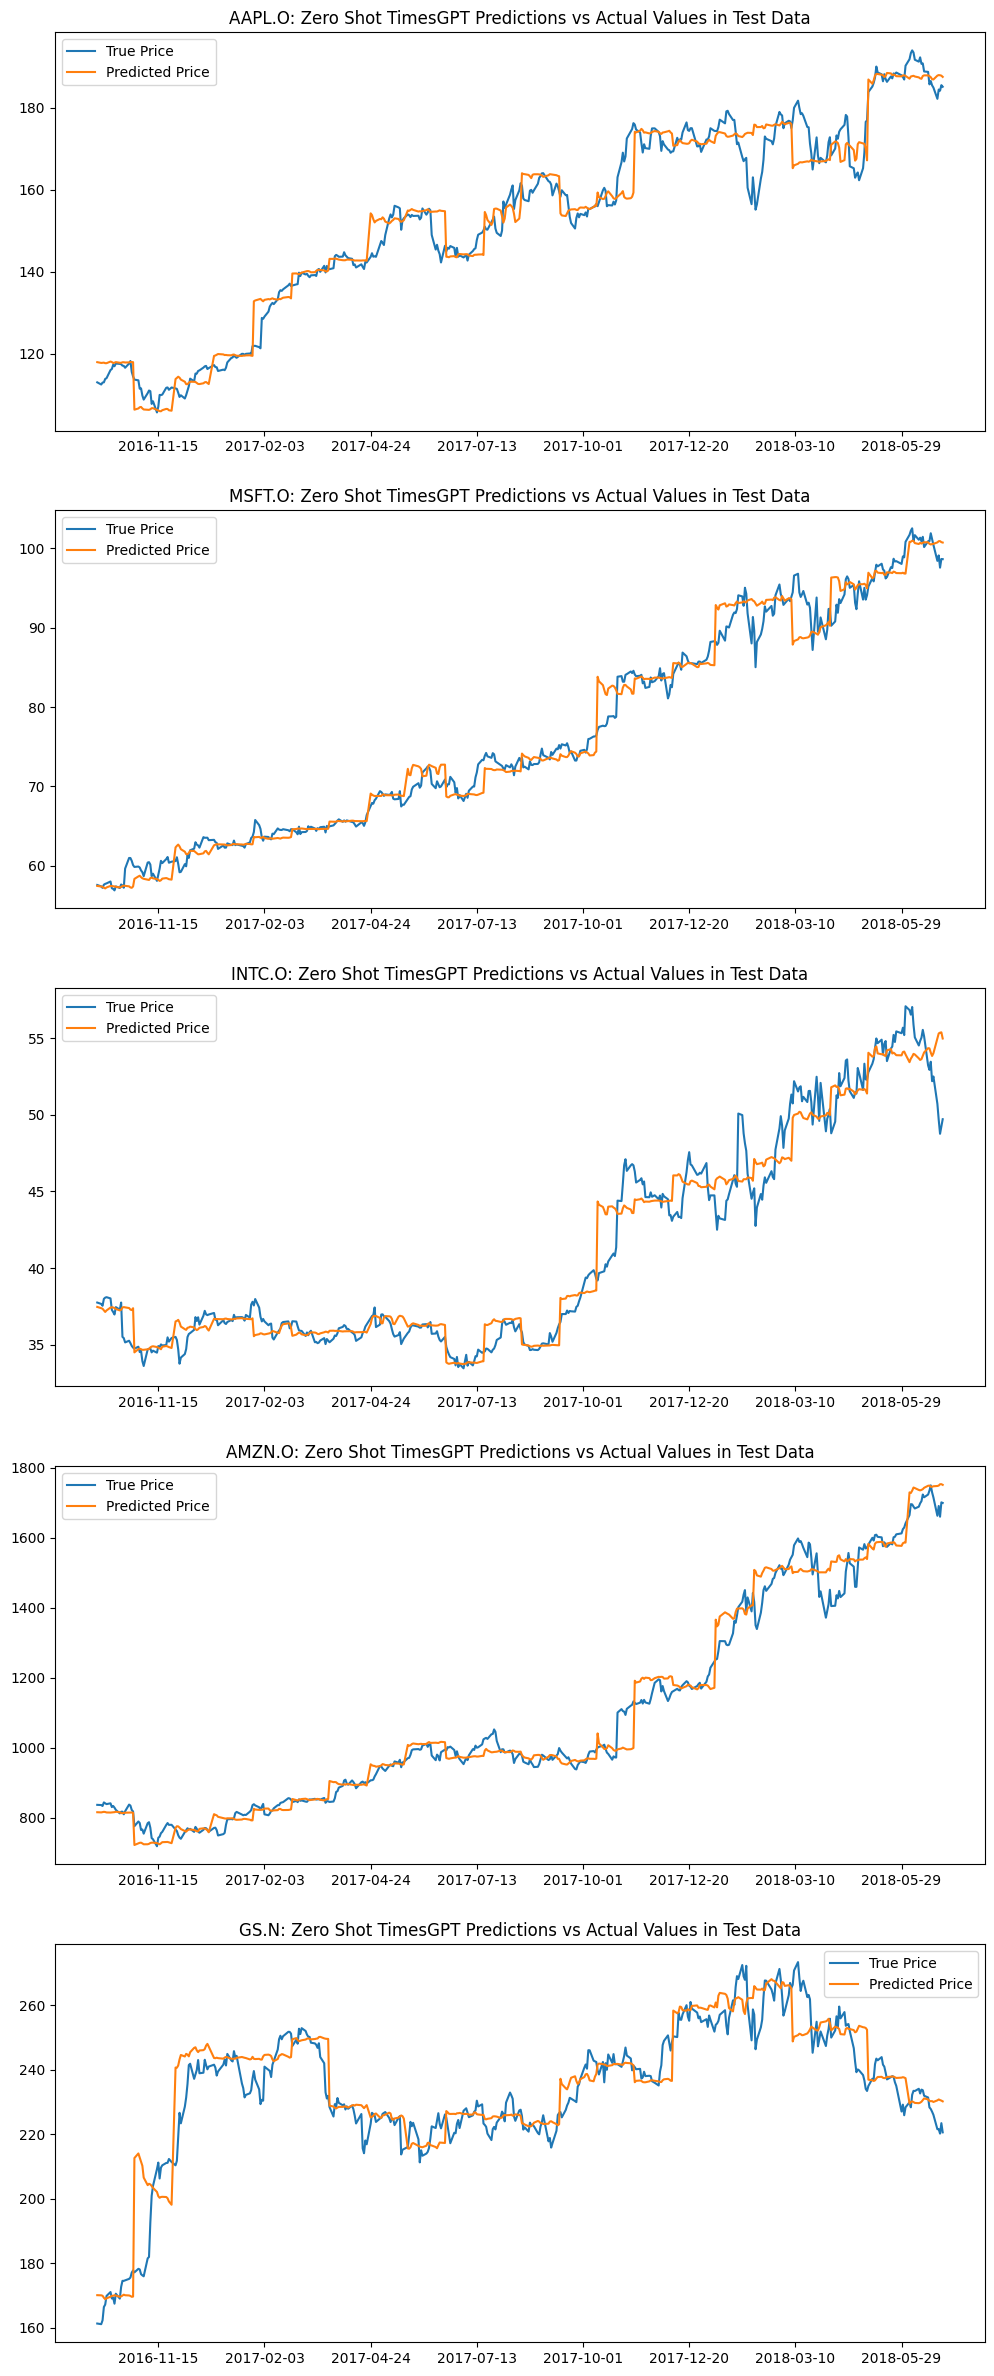

In [129]:
# Plot the predictions and the true values
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(5, 1, figsize=(12, 30))
for i, stock in enumerate(tickers_to_use):
    ax[i].plot(testing_data[stock].index, testing_data[stock][stock], label='True Price')
    ax[i].plot(testing_data[stock].index, final_predictions_zero_shot[stock]['TimeGPT'], label='Predicted Price')
    ax[i].xaxis.set_major_locator(MaxNLocator(nbins=10))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[i].set_title(stock + ': Zero Shot TimesGPT Predictions vs Actual Values in Test Data')
    ax[i].legend()

The predictions are reasonably close to the actual prices.

## Use the zero-shot predictions to generate buy/sell signals using the naive strategy

In [ ]:
# Returns without any tweaks
comparison_table = pd.DataFrame()
for stock in tickers_to_use:
    stock_values = testing_data[stock][stock]
    stock_returns = testing_data[stock]['Returns']
    stock_predictions = np.array(final_predictions_zero_shot[stock]['TimeGPT'])
    signals_1 = generate_signals(stock_predictions, stock_values, 0)
    returns_1 = signals_1 * stock_returns
    signals_2 = generate_signals(stock_predictions, stock_predictions, 0)
    returns_2 = signals_2 * stock_returns
    returns_without_tweaks = max(np.exp(returns_1.sum()), np.exp(returns_2.sum()))
    returns_using_benchmark = np.exp(stock_returns.sum())
    comparison_table[stock] = [returns_without_tweaks, returns_using_benchmark]
comparison_table.index = ['Returns without any tweaks', 'Returns using benchmark']
comparison_table.T

/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_price = true_price[i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_price = true_price[i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

,Returns without any tweaks,Returns using benchmark
AAPL.O,3.361030,1.637417
MSFT.O,4.160490,1.711979
INTC.O,5.187056,1.316821
AMZN.O,4.059847,2.030072
GS.N,3.090793,1.367706


The naive strategy itself beats the benchmark as well as the ARIMA model predictions.

## Use the zero-shot predictions to generate buy/sell signals using a combination of different strategies

In [ ]:
from collections import defaultdict
final_signals_zero_shot = defaultdict(list)
comparison_table = pd.DataFrame()

for stock in tickers_to_use:
    stock_predictions = final_predictions_zero_shot[stock]['TimeGPT']
    stock_values = testing_data[stock][stock]
    max_return = -np.inf
    best_low = None
    best_high = None
    best_window = None
    best_pct_within = None
    best_signals = None
    for window in range(5, 30, 2):
        stock_rsi = calculate_rsi(stock_predictions, window)
        macd_line, signal_line, histogram = calculate_macd(stock_predictions)
        stock_macd = macd_line - signal_line
        for low in range(25, 40, 2):
            for high in range(60, 65, 1):
                for pct_within in np.linspace(0.0, 0.01, 100):
                    rsi_signals = rsi_trading_strategy(stock_rsi, low, high)
                    rsi_signals = np.where(rsi_signals > 0, 1, -1)
                    macd_signals = macd_trading_strategy(macd_line, signal_line)
                    macd_signals = np.where(macd_signals > 0, 1, -1)
                    other_signals_1 = generate_signals(stock_predictions.values, stock_predictions.values, pct_within)
                    other_signals_2 = generate_signals(stock_predictions.values, stock_values.values, pct_within)

                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    signals = np.where((stock_rsi < low) & (stock_macd > 0), 1,
                                np.where((stock_rsi > high) & (stock_macd < 0), -1, 0))
                    for i in range(1, len(testing_data)):
                        if signals[i] == 0:
                            signals[i] = signals[i - 1]
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    signals = np.where((stock_rsi < low) & (stock_macd > 0), 1,
                                np.where((stock_rsi > high) & (stock_macd < 0), -1, 0))
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Only other_signals_1
                    signals = other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    # Only rsi_signals
                    signals = rsi_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    # Only macd_signals
                    signals = macd_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    # Only other_signals_2
                    signals = other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
    comparison_table[stock] = [best_low, best_high, best_window, best_pct_within, max_return, np.exp(testing_data[stock]['Returns'].sum())]
    final_signals_zero_shot[stock] = best_signals
comparison_table.index = ['Best Low', 'Best High', 'Best Window', 'Best Pct Within', 'Returns', 'Returns using benchmark']
comparison_table.T

,Best Low,Best High,Best Window,Best Pct Within,Returns,Returns using benchmark
AAPL.O,25.0,60.0,5.0,0.000101,3.465853,1.637417
MSFT.O,25.0,60.0,5.0,0.000000,4.160490,1.711979
INTC.O,25.0,60.0,5.0,0.000606,5.305262,1.316821
AMZN.O,25.0,60.0,5.0,0.004949,4.808534,2.030072
GS.N,25.0,60.0,5.0,0.002929,3.972071,1.367706


Optimizing the parameters and incorporating other technical indicators can further improved the performance of the model.

## Compute the evaluation metrics for the zero-shot predictions

In [ ]:
# Precision, Recall, F1 Score
comparison_table = pd.DataFrame()
comparison_table_benchmark = pd.DataFrame()
from sklearn.metrics import precision_recall_fscore_support
for stock in tickers_to_use:
    # Drop NaN values
    ideal_signals[stock] = ideal_signals[stock].dropna()
    final_signals_zero_shot[stock] = final_signals_zero_shot[stock][:len(ideal_signals[stock])]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], final_signals_zero_shot[stock], average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != final_signals_zero_shot[stock])
    comparison_table[stock] = [precision, recall, f1, num_of_false_predictions]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], np.ones(len(ideal_signals[stock])), average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != np.ones(len(ideal_signals[stock])))
    comparison_table_benchmark[stock] = [precision, recall, f1, num_of_false_predictions]

comparison_table.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']
comparison_table_benchmark.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packag

In [ ]:
comparison_table.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.526832,0.528474,0.527191,207.0
MSFT.O,0.568383,0.560364,0.560364,193.0
INTC.O,0.555638,0.553531,0.554172,196.0
AMZN.O,0.571754,0.571754,0.571754,188.0
GS.N,0.569524,0.569476,0.565840,189.0


In [ ]:
comparison_table_benchmark.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.281697,0.530752,0.368051,206.0
MSFT.O,0.293917,0.542141,0.381181,201.0
INTC.O,0.291452,0.539863,0.378543,202.0
AMZN.O,0.316566,0.562642,0.405168,192.0
GS.N,0.262685,0.512528,0.347346,214.0


In [ ]:
# Ideal Signals (i.e. the true signals)
ideal_signals = {}
for stock in tickers_to_use:
    stock_returns = testing_data[stock]['Returns']
    true_signals = np.sign(stock_returns)
    ideal_signals[stock] = true_signals

In [ ]:
# Confusion Matrix for better understanding of the model's performance
from sklearn.metrics import confusion_matrix
confusion_matrices = {}
for stock in tickers_to_use:
    # Replace 0s in final_signals zero shot with previous day's signal
    for i in range(1, len(ideal_signals[stock])):
        if ideal_signals[stock][i] == 0:
            ideal_signals[stock][i] = final_signals_zero_shot[stock][i - 1]
    confusion_matrices[stock] = confusion_matrix(ideal_signals[stock], final_signals_zero_shot[stock])
for stock, matrix in confusion_matrices.items():
    print(f'{stock} Confusion Matrix:')
    print(matrix)

AAPL.O Confusion Matrix:
[[ 96 110]
 [ 97 136]]
MSFT.O Confusion Matrix:
[[123  78]
 [115 123]]
INTC.O Confusion Matrix:
[[110  92]
 [104 133]]
AMZN.O Confusion Matrix:
[[ 98  94]
 [ 94 153]]
GS.N Confusion Matrix:
[[102 112]
 [ 77 148]]


/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/1574911042.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ideal_signals[stock][i] == 0:
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/1574911042.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ideal_signals[stock][i] == 0:
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/1574911042.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

## Visualize the confusion matrix

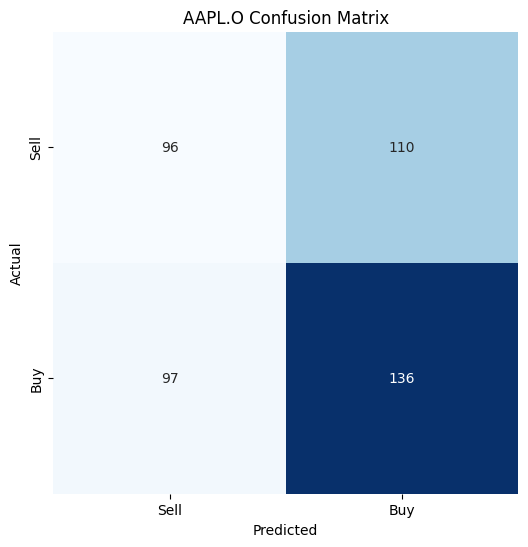

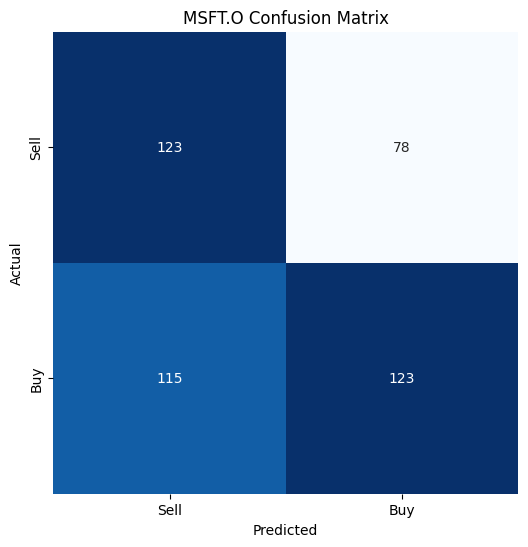

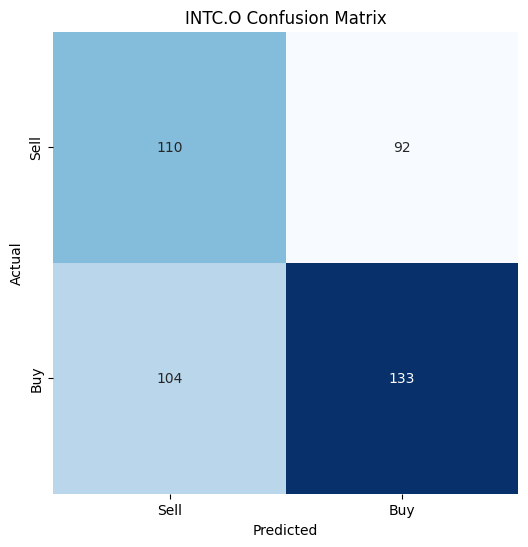

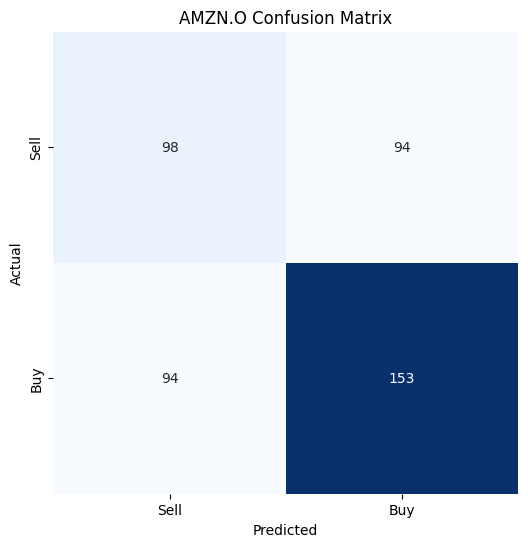

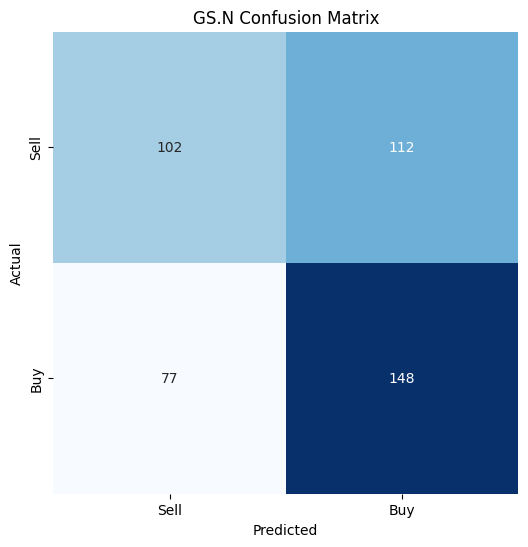

In [ ]:
# Convert the confusion matrices into heatmaps in the same figure
import seaborn as sns
for stock, matrix in confusion_matrices.items():
    plt.figure(figsize=(6, 6), dpi=100)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
    plt.title(f'{stock} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Compute the losses for different loss functions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluation(test_y, pre_y):
    mse = mean_squared_error(test_y, pre_y)
    mae = mean_absolute_error(test_y, pre_y)
    mpe = np.mean((test_y - pre_y) / test_y) * 100
    mape = np.mean(np.abs((test_y - pre_y) / test_y)) * 100
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Percentage Error (MPE): {mpe}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
for stock in tickers_to_use:
    print(f'{stock}:')
    stock_values = testing_data[stock][stock].values
    stock_predictions = final_predictions_zero_shot[stock]['TimeGPT'].values
    evaluation(stock_values, stock_predictions)

AAPL.O:
Mean Squared Error (MSE): 23.064289572242913
Mean Absolute Error (MAE): 3.359070425553755
Mean Percentage Error (MPE): -0.23271599269818583
Mean Absolute Percentage Error (MAPE): 2.2211023191116843
MSFT.O:
Mean Squared Error (MSE): 3.788345787841988
Mean Absolute Error (MAE): 1.3307934858148749
Mean Percentage Error (MPE): 0.08386248993440697
Mean Absolute Percentage Error (MAPE): 1.7036257625926734
INTC.O:
Mean Squared Error (MSE): 2.17877957864266
Mean Absolute Error (MAE): 1.0195899904424495
Mean Percentage Error (MPE): -0.3152976224427479
Mean Absolute Percentage Error (MAPE): 2.3893492469485986
AMZN.O:
Mean Squared Error (MSE): 1756.0163006672162
Mean Absolute Error (MAE): 29.365505215731545
Mean Percentage Error (MPE): -0.19427906811458953
Mean Absolute Percentage Error (MAPE): 2.592535979726139
GS.N:
Mean Squared Error (MSE): 66.9461898509528
Mean Absolute Error (MAE): 5.585284760908647
Mean Percentage Error (MPE): -0.8825609288438596
Mean Absolute Percentage Error (MAPE

## Plot the total returns at any given time

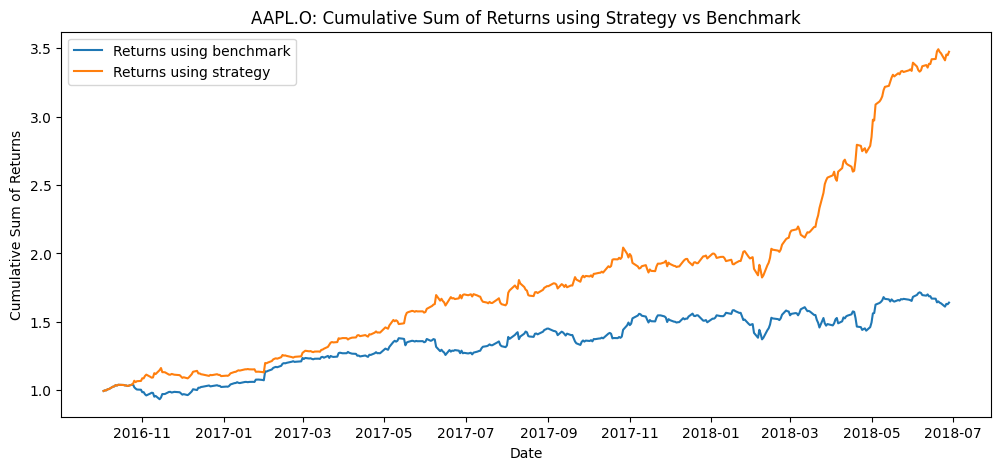

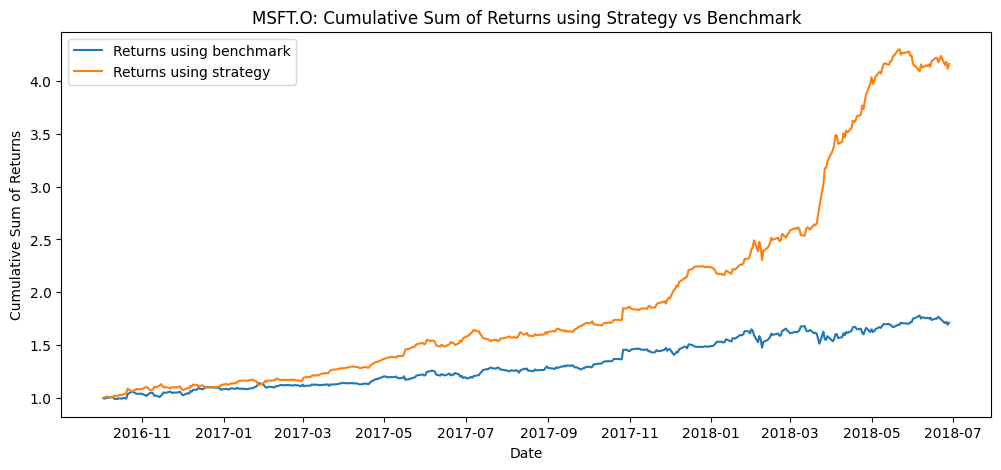

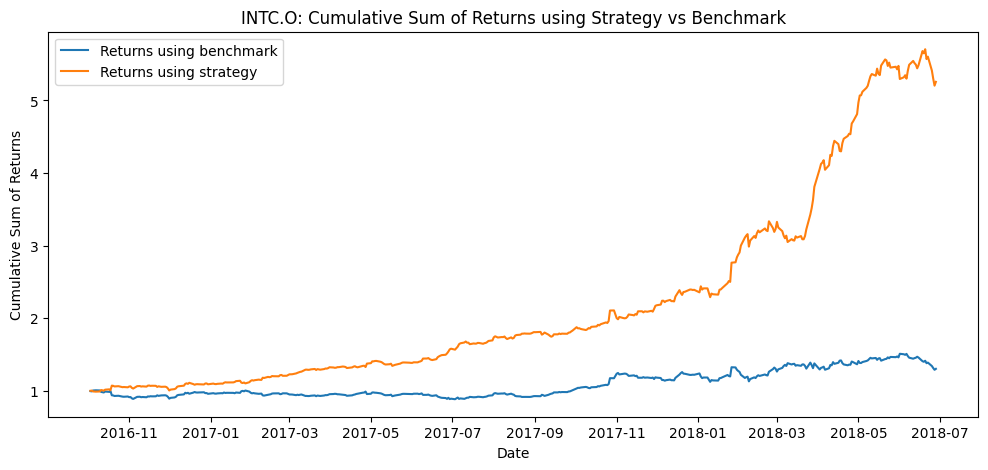

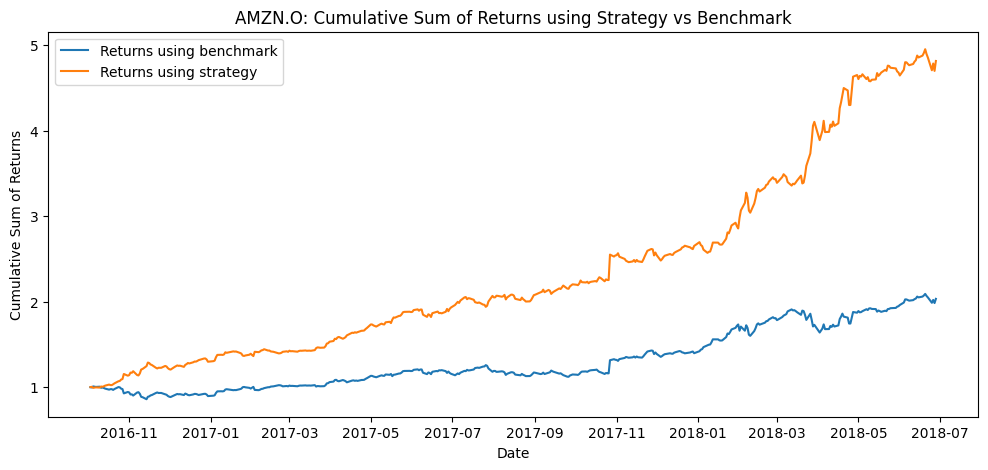

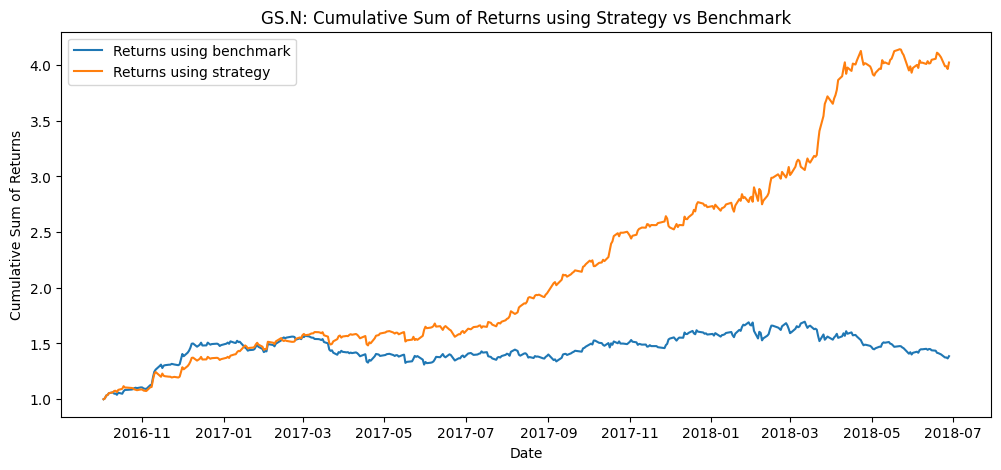

In [ ]:
# Plot cumsum of returns using strategy and returns using benchmark
for stock in tickers_to_use:
    stock_values = testing_data[stock][stock]
    signals = final_signals_zero_shot[stock]
    stock_returns = testing_data[stock]['Returns'][:len(signals)]
    returns = signals * stock_returns
    # Plot the cumulative sum of returns and stock_returns
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(stock_returns.index, np.exp(stock_returns.cumsum()), label='Returns using benchmark')
    plt.plot(stock_returns.index, np.exp(returns.cumsum()), label='Returns using strategy')
    plt.title(f'{stock}: Cumulative Sum of Returns using Strategy vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Sum of Returns')
    plt.legend()

## Predict Prices (After fine tuning)

In [123]:
final_predictions = {}
i = 0
for ticker in tickers_to_use:
    data_ticker = pd.DataFrame(data[ticker])
    data_ticker['timestamp'] = data.index
    values_per_ticker_predicted_in_one_run = 20 # We experimentally found that 20 values per ticker per prediction is the best
    n_tickers = 1
    values_predicted_in_one_run = values_per_ticker_predicted_in_one_run * n_tickers
    train_test_split = 0.8
    number_of_rows_in_train = int(len(data_ticker) * train_test_split) * n_tickers
    number_of_rows_in_test = len(data_ticker) - number_of_rows_in_train
    number_of_runs = number_of_rows_in_test // values_predicted_in_one_run
    predictions = None
    context_length = 300 # We experimentally found that having a context length of 300 is the best
    start_row = number_of_rows_in_train - context_length * n_tickers
    end_row = number_of_rows_in_train
    for i in range(number_of_runs + 1):
        train = data_ticker.iloc[start_row:end_row]
        start_row += values_predicted_in_one_run
        end_row += values_predicted_in_one_run
        timegpt_next_prediction = timegpt.forecast(df=train, h=values_per_ticker_predicted_in_one_run, time_col='timestamp', target_col=ticker,freq='B', finetune_loss='mae', finetune_steps=10)
        if predictions is None:
            predictions = timegpt_next_prediction
        else:
            predictions = pd.concat([predictions, timegpt_next_prediction])
    final_predictions[ticker] = predictions
    i += 1


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endp

In [127]:
final_predictions.keys()

dict_keys(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N'])

## Plot the predictions

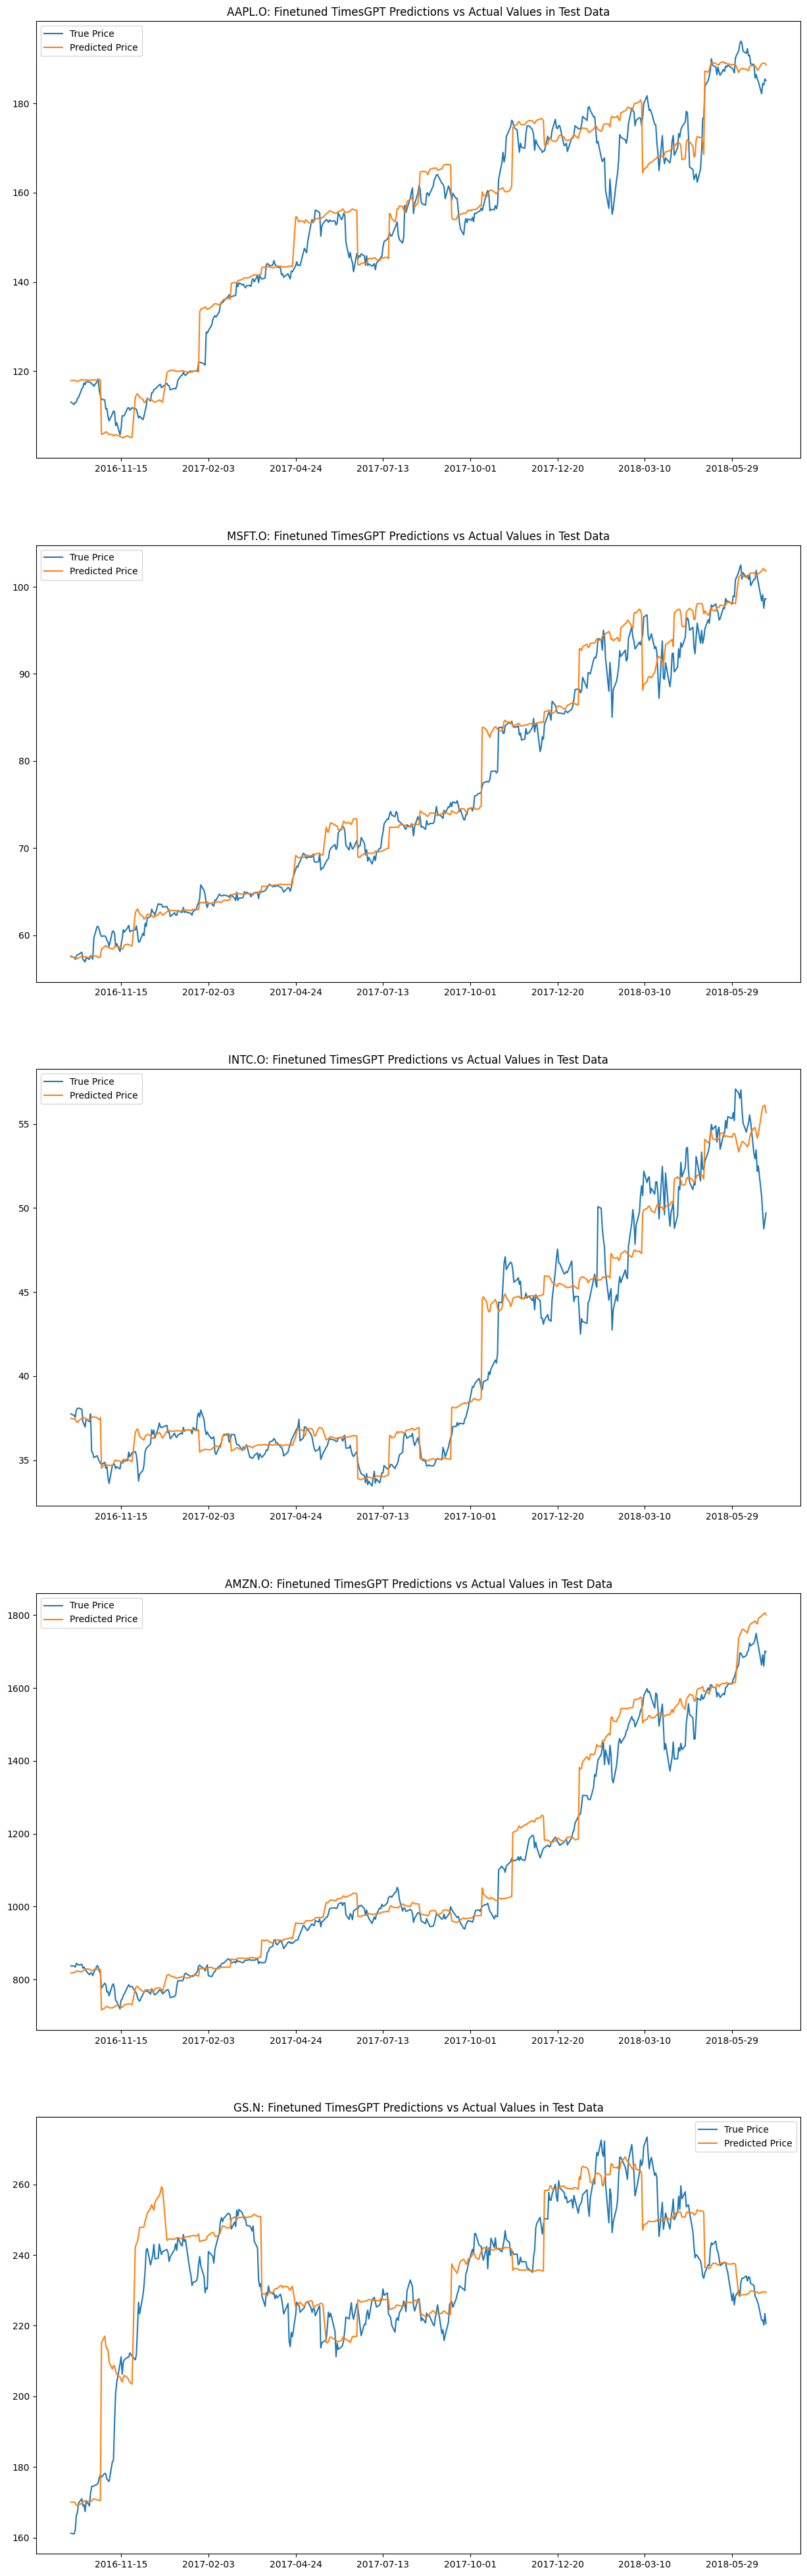

In [ ]:
# Plot the predictions and the true values on the test data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(5, 1, figsize=(15, 50))
for i, stock in enumerate(tickers_to_use):
    ax[i].plot(testing_data[stock].index, testing_data[stock][stock], label='True Price')
    ax[i].plot(testing_data[stock].index, final_predictions[stock]['TimeGPT'], label='Predicted Price')
    ax[i].xaxis.set_major_locator(MaxNLocator(nbins=10))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[i].set_title(stock + ': Finetuned TimesGPT Predictions vs Actual Values in Test Data')
    ax[i].legend()

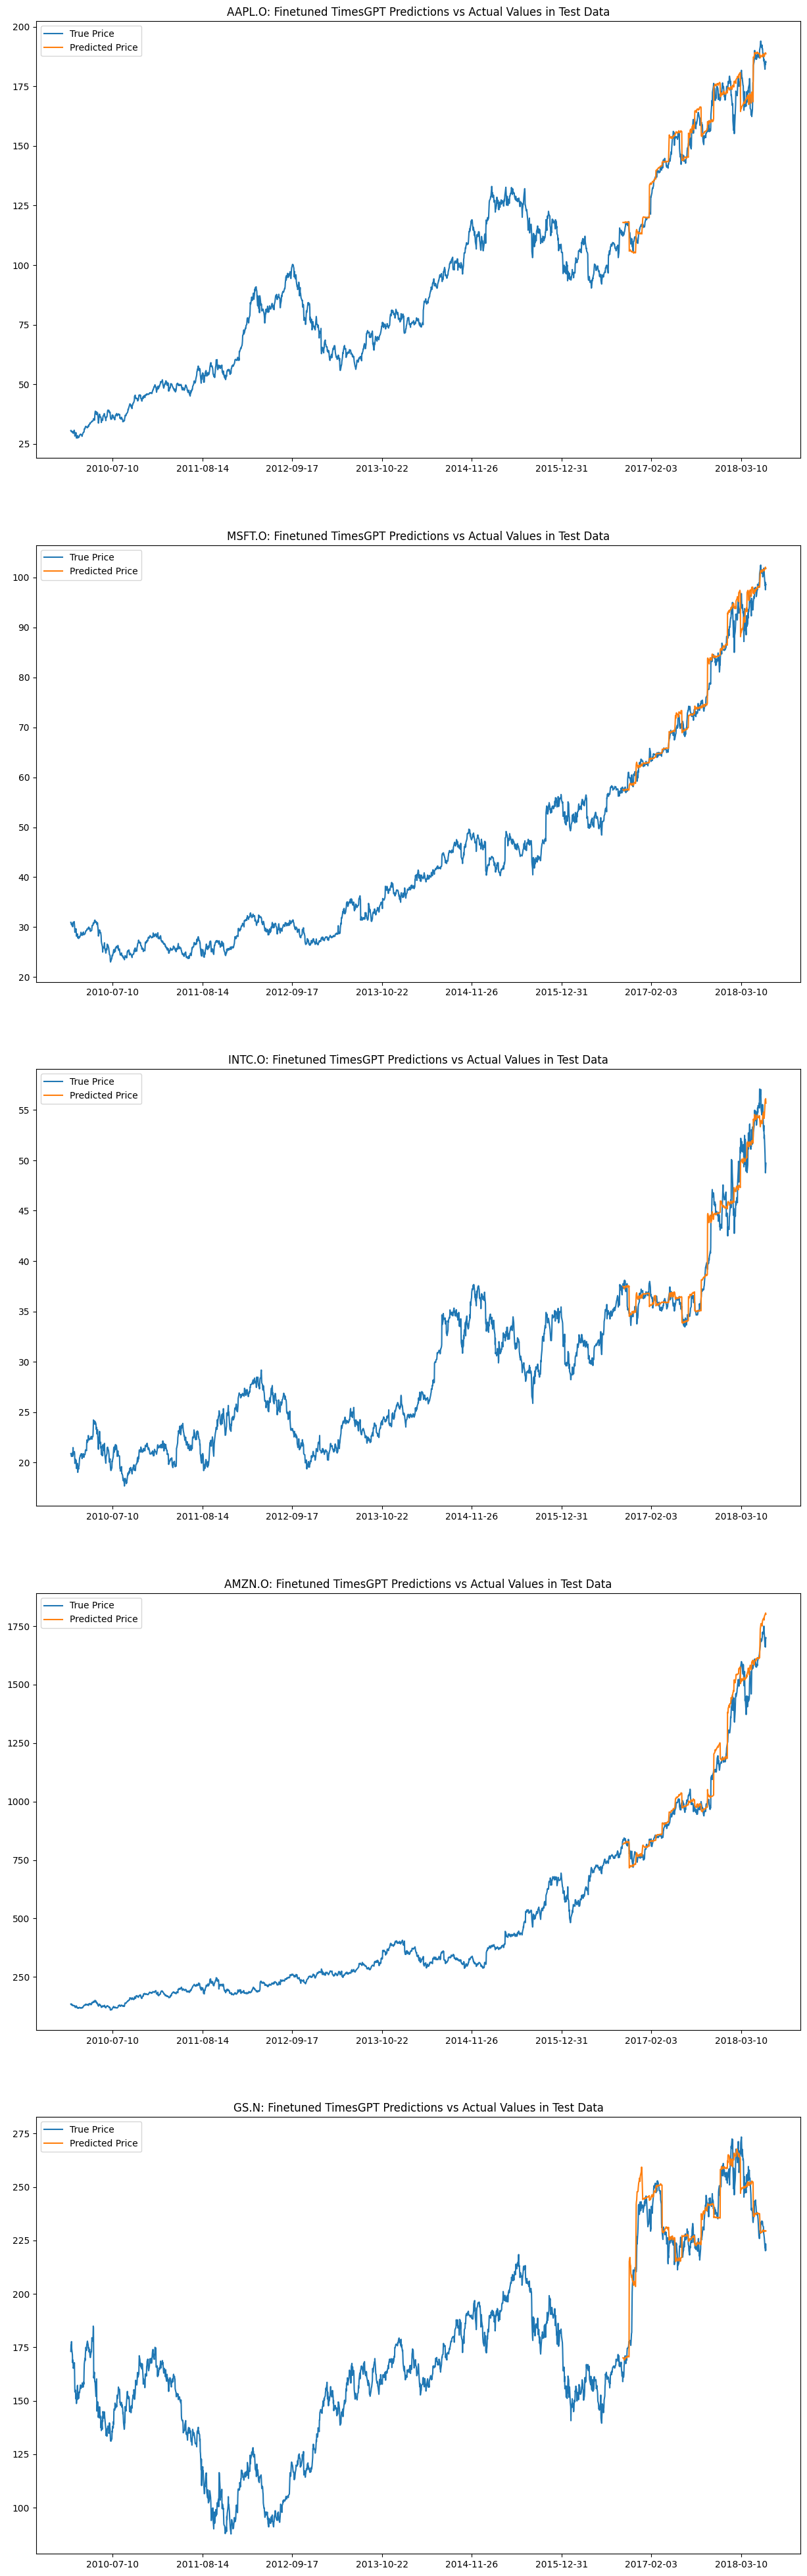

In [ ]:
# Plot the predictions and the true values on the entire data set
fig, ax = plt.subplots(5, 1, figsize=(15, 50))
for i, stock in enumerate(tickers_to_use):
    entire_data = pd.DataFrame(data[stock], columns=[stock], index=data.index)
    ax[i].plot(data.index, data[stock], label='True Price')
    ax[i].plot(data[-len(final_predictions[stock]):].index, final_predictions[stock]['TimeGPT'], label='Predicted Price')
    ax[i].xaxis.set_major_locator(MaxNLocator(nbins=10))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[i].set_title(stock + ': Finetuned TimesGPT Predictions vs Actual Values in Test Data')
    ax[i].legend()


## Use the fine-tuned predictions to generate buy/sell signals using the naive strategy

In [ ]:
# Returns without any tweaks
comparison_table = pd.DataFrame()
for stock in tickers_to_use:
    stock_values = testing_data[stock][stock]
    stock_returns = testing_data[stock]['Returns']
    stock_predictions = np.array(final_predictions[stock]['TimeGPT'])
    signals_1 = generate_signals(stock_predictions, stock_values, 0)
    returns_1 = signals_1 * stock_returns
    signals_2 = generate_signals(stock_predictions, stock_predictions, 0)
    returns_2 = signals_2 * stock_returns
    returns_without_tweaks = max(np.exp(returns_1.sum()), np.exp(returns_2.sum()))
    returns_using_benchmark = np.exp(stock_returns.sum())
    comparison_table[stock] = [returns_without_tweaks, returns_using_benchmark]
comparison_table.index = ['Returns without any tweaks', 'Returns using benchmark']
comparison_table.T

/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_price = true_price[i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_price = true_price[i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/4286599706.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

,Returns without any tweaks,Returns using benchmark
AAPL.O,2.792569,1.637417
MSFT.O,3.163522,1.711979
INTC.O,5.614081,1.316821
AMZN.O,3.389851,2.030072
GS.N,3.452939,1.367706


## Use the fine-tuned predictions to generate buy/sell signals using a combination of different strategies

In [73]:
from collections import defaultdict
testing_data = {}
training_data = {}
final_signals = defaultdict(list)
comparison_table = pd.DataFrame()

for stock in tickers_to_use:
    testing_data[stock] = pd.DataFrame(data[stock].iloc[-len(final_predictions[stock]):])
    testing_data[stock]['Returns'] = np.log(testing_data[stock][stock] / testing_data[stock][stock].shift(1))

for stock in tickers_to_use:
    stock_predictions = final_predictions[stock]['TimeGPT']
    stock_values = testing_data[stock][stock]
    max_return = -np.inf
    best_low = None
    best_high = None
    best_window = None
    best_pct_within = None
    best_signals = None
    for window in range(5, 30, 2):
        stock_rsi = calculate_rsi(stock_predictions, window)
        macd_line, signal_line, histogram = calculate_macd(stock_predictions)
        stock_macd = macd_line - signal_line
        for low in range(25, 40, 2):
            for high in range(60, 65, 1):
                for pct_within in np.linspace(0.0, 0.01, 100):
                    rsi_signals = rsi_trading_strategy(stock_rsi, low, high)
                    rsi_signals = np.where(rsi_signals > 0, 1, -1) # Generate RSI signals
                    macd_signals = macd_trading_strategy(macd_line, signal_line)
                    macd_signals = np.where(macd_signals > 0, 1, -1) # Generate MACD signals
                    other_signals_1 = generate_signals(stock_predictions.values, stock_predictions.values, pct_within) # Generate signals based on a window of margin around the previous predicted price
                    other_signals_2 = generate_signals(stock_predictions.values, stock_values.values, pct_within) # Generate signals based on a window of margin around the previous actual price

                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use a combination of RSI and MACD signals
                    signals = np.where((stock_rsi < low) & (stock_macd > 0), 1,
                                np.where((stock_rsi > high) & (stock_macd < 0), -1, 0))
                    for i in range(1, len(testing_data)):
                        if signals[i] == 0:
                            signals[i] = signals[i - 1]
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use a combination of RSI and MACD signals
                    signals = np.where((stock_rsi < low) & (stock_macd > 0), 1,
                                np.where((stock_rsi > high) & (stock_macd < 0), -1, 0))
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use only other_signals_1
                    signals = other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    # Use only rsi_signals
                    signals = rsi_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    # Use only macd_signals
                    signals = macd_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                        
                    # Use only other_signals_2
                    signals = other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
    comparison_table[stock] = [best_low, best_high, best_window, best_pct_within, max_return, np.exp(testing_data[stock]['Returns'].sum())]
    final_signals[stock] = best_signals
comparison_table.index = ['Best Low', 'Best High', 'Best Window', 'Best Pct Within', 'Returns', 'Returns using benchmark']
comparison_table.T

,Best Low,Best High,Best Window,Best Pct Within,Returns,Returns using benchmark
AAPL.O,25.0,60.0,5.0,0.003939,3.146171,1.637417
MSFT.O,25.0,60.0,5.0,0.000202,3.212057,1.711979
INTC.O,25.0,60.0,5.0,0.001818,5.996240,1.316821
AMZN.O,25.0,60.0,5.0,0.008687,3.620127,2.030072
GS.N,25.0,60.0,5.0,0.002020,3.621262,1.367706


## Compute the evaluation metrics for the fine-tuned predictions

In [75]:
# Precision, Recall, F1 Score
comparison_table = pd.DataFrame()
comparison_table_benchmark = pd.DataFrame()
from sklearn.metrics import precision_recall_fscore_support
for stock in tickers_to_use:
    # Drop NaN values
    ideal_signals[stock] = ideal_signals[stock].dropna()
    final_signals[stock] = final_signals[stock][:len(ideal_signals[stock])]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], final_signals[stock], average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != final_signals[stock])
    comparison_table[stock] = [precision, recall, f1, num_of_false_predictions]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], np.ones(len(ideal_signals[stock])), average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != np.ones(len(ideal_signals[stock])))
    comparison_table_benchmark[stock] = [precision, recall, f1, num_of_false_predictions]

comparison_table.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']
comparison_table_benchmark.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packag

In [77]:
# Using strategy
comparison_table.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.521268,0.530752,0.512215,206.0
MSFT.O,0.543347,0.558087,0.543864,194.0
INTC.O,0.550737,0.558087,0.553365,194.0
AMZN.O,0.580954,0.589977,0.568746,180.0
GS.N,0.554611,0.555809,0.549150,195.0


In [78]:
# Using benchmark
comparison_table_benchmark.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.279285,0.528474,0.365442,207.0
MSFT.O,0.284121,0.533030,0.370665,205.0
INTC.O,0.284121,0.533030,0.370665,205.0
AMZN.O,0.316566,0.562642,0.405168,192.0
GS.N,0.260356,0.510251,0.344785,215.0


In [110]:
# Confusion Matrix for better understanding of the model's performance
from sklearn.metrics import confusion_matrix
confusion_matrices = {}
for stock in tickers_to_use:
    # Replace 0s in final_signals with previous day's signal
    for i in range(1, len(ideal_signals[stock])):
        if ideal_signals[stock][i] == 0:
            ideal_signals[stock][i] = final_signals[stock][i - 1]
    confusion_matrices[stock] = confusion_matrix(ideal_signals[stock], final_signals[stock])
for stock, matrix in confusion_matrices.items():
    print(f'{stock} Confusion Matrix:')
    print(matrix)

AAPL.O Confusion Matrix:
[[ 69 137]
 [ 67 166]]
MSFT.O Confusion Matrix:
[[ 83 118]
 [ 70 168]]
INTC.O Confusion Matrix:
[[ 98 104]
 [ 86 151]]
AMZN.O Confusion Matrix:
[[ 66 126]
 [ 54 193]]
GS.N Confusion Matrix:
[[ 94 120]
 [ 75 150]]


/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/3166127340.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ideal_signals[stock][i] == 0:
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/3166127340.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ideal_signals[stock][i] == 0:
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_16686/3166127340.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

## Visualize the confusion matrix

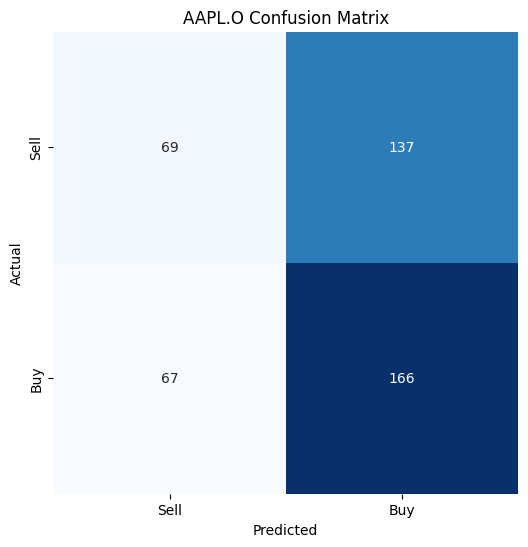

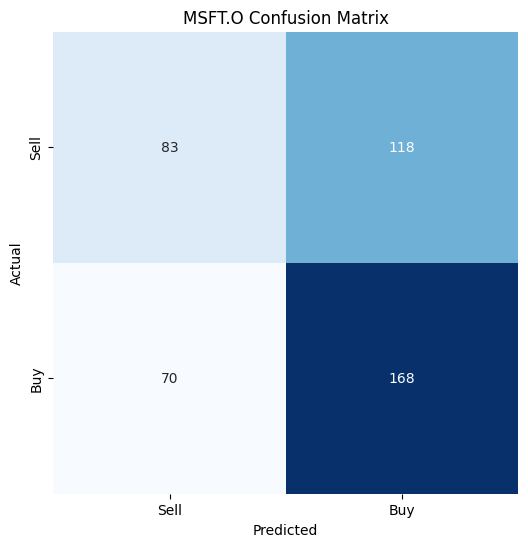

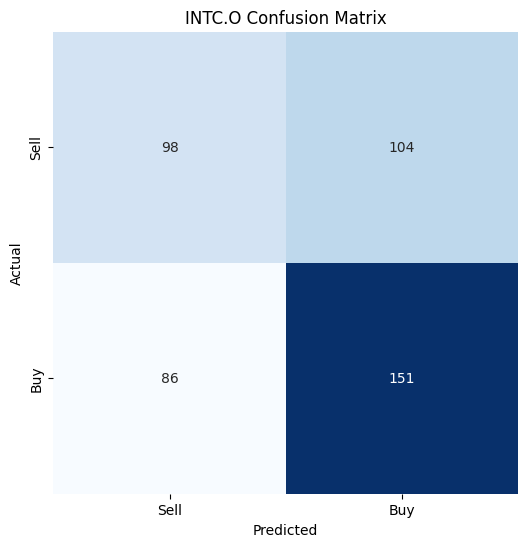

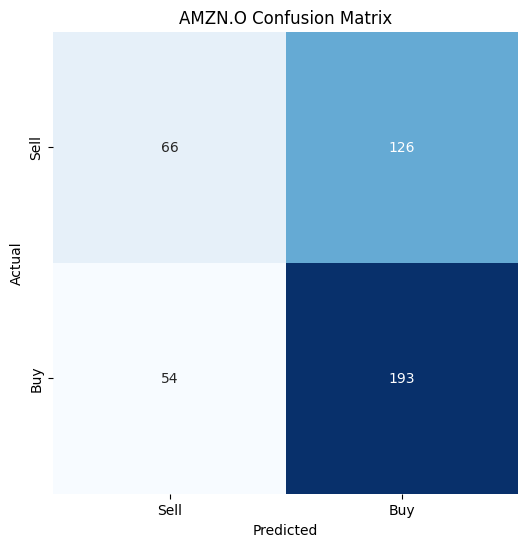

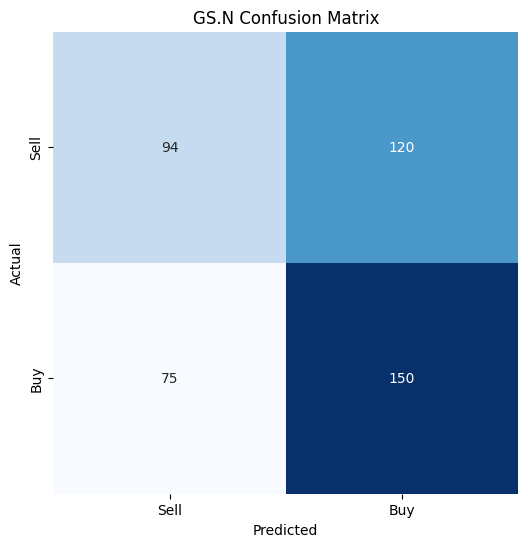

In [113]:
# Convert the confusion matrices into heatmaps in the same figure
import seaborn as sns
for stock, matrix in confusion_matrices.items():
    plt.figure(figsize=(6, 6), dpi=100)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
    plt.title(f'{stock} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Compute the losses for different loss functions

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluation(test_y, pre_y):
    mse = mean_squared_error(test_y, pre_y)
    mae = mean_absolute_error(test_y, pre_y)
    mpe = np.mean((test_y - pre_y) / test_y) * 100
    mape = np.mean(np.abs((test_y - pre_y) / test_y)) * 100
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Percentage Error (MPE): {mpe}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
for stock in tickers_to_use:
    print(f'{stock}:')
    stock_values = testing_data[stock][stock].values
    stock_predictions = final_predictions[stock]['TimeGPT'].values
    evaluation(stock_values, stock_predictions)

AAPL.O:
Mean Squared Error (MSE): 26.131502047279753
Mean Absolute Error (MAE): 3.6935360135165123
Mean Percentage Error (MPE): -0.8262570971181004
Mean Absolute Percentage Error (MAPE): 2.4448854596566614
MSFT.O:
Mean Squared Error (MSE): 4.688111568372756
Mean Absolute Error (MAE): 1.4621070067665796
Mean Percentage Error (MPE): -0.7293595626313644
Mean Absolute Percentage Error (MAPE): 1.8396353894575181
INTC.O:
Mean Squared Error (MSE): 2.298555739165937
Mean Absolute Error (MAE): 1.0250440288890492
Mean Percentage Error (MPE): -0.6408431837902111
Mean Absolute Percentage Error (MAPE): 2.414427810920552
AMZN.O:
Mean Squared Error (MSE): 2487.481346412962
Mean Absolute Error (MAE): 36.090053322531965
Mean Percentage Error (MPE): -1.5198151887303604
Mean Absolute Percentage Error (MAPE): 3.128979871459784
GS.N:
Mean Squared Error (MSE): 79.34693786247212
Mean Absolute Error (MAE): 5.989977243596856
Mean Percentage Error (MPE): -1.1885669586982068
Mean Absolute Percentage Error (MAPE)

## Plot the total returns at any given time

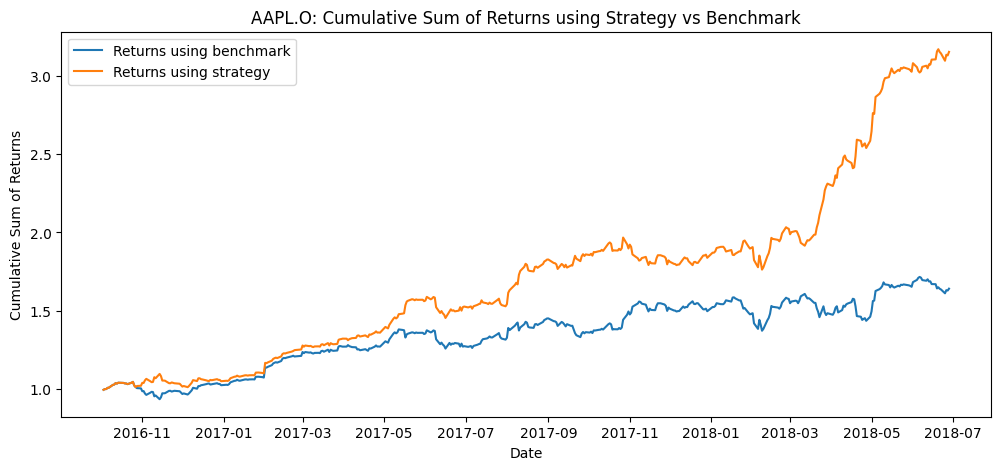

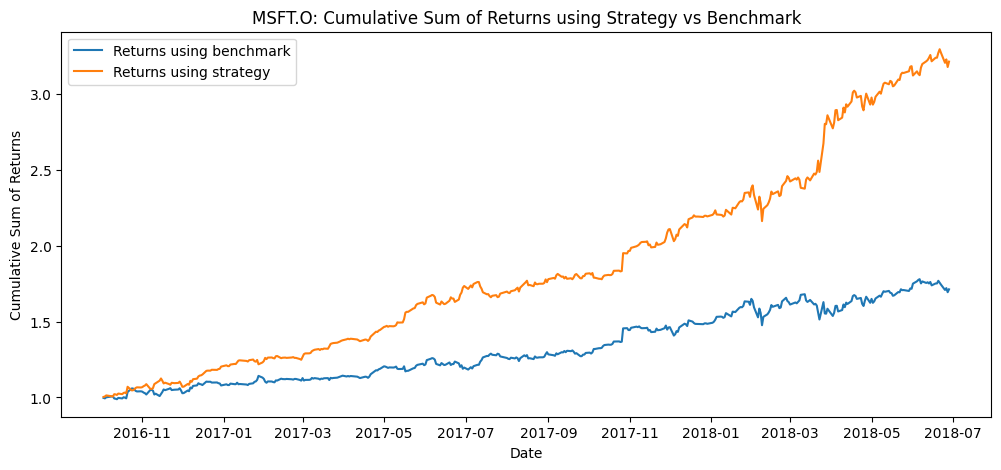

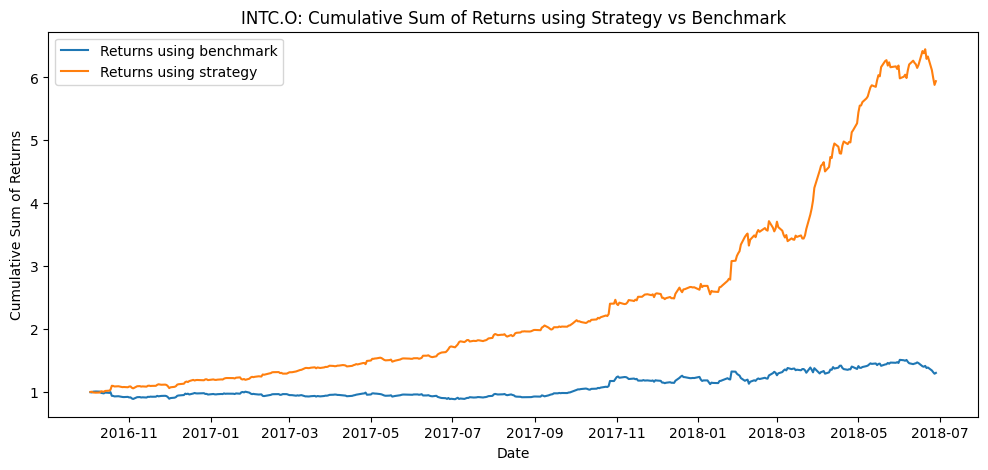

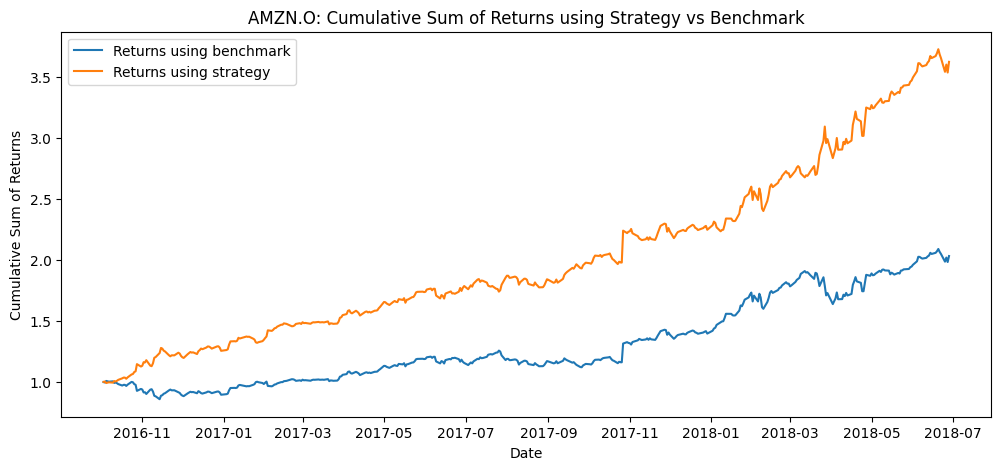

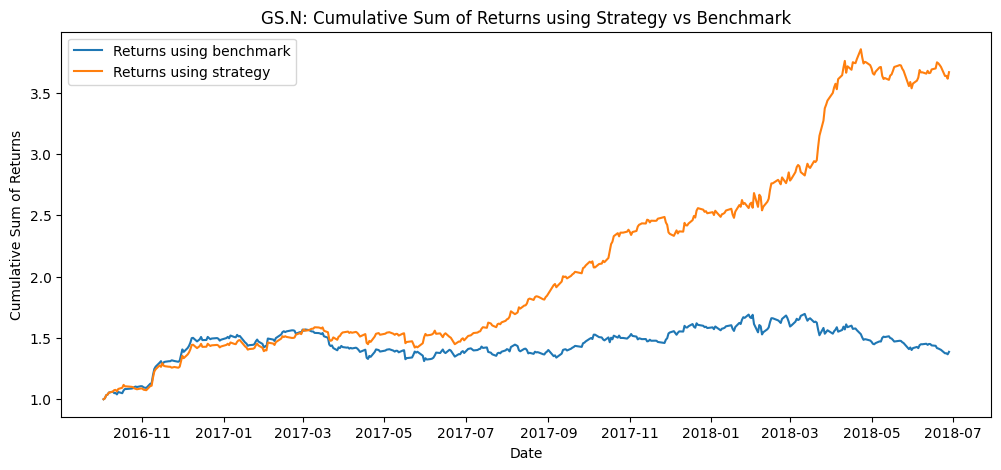

In [108]:
# Plot cumsum of returns using strategy and returns using benchmark
for stock in tickers_to_use:
    stock_values = testing_data[stock][stock]
    signals = final_signals[stock]
    stock_returns = testing_data[stock]['Returns'][:len(signals)]
    returns = signals * stock_returns
    # Plot the cumulative sum of returns and stock_returns
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(stock_returns.index, np.exp(stock_returns.cumsum()), label='Returns using benchmark')
    plt.plot(stock_returns.index, np.exp(returns.cumsum()), label='Returns using strategy')
    plt.title(f'{stock}: Cumulative Sum of Returns using Strategy vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Sum of Returns')
    plt.legend()